# Problem

The psychologist Tversky and his colleagues say that about four out of ﬁve people will answer (1) to the following question: 

A certain town is served by two hospitals. In the larger hospital about 45 babies are born each day, and in the smaller hospital 15 babies are born each day. Although the overall proportion of boys is about 50 percent, the actual proportion at either hospital may be more or less than 50 percent on any day.


At the end of a year, which hospital will have the greater number of days on which more than 60 percent of the babies born were boys?
 1. the large hospital 
 2. the small hospital 
 3. neither—the number of days will be about the same.
 
Assume that the probability that a baby is a boy is .5 (actual estimates make this more like .513). Decide, by simulation, what the right answer is to the question. Can you suggest why so many people go wrong?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
N_SIMMULATIONS = 200

NUMBER_OF_DAYS = 365
BOY_OR_GIRL = (True,False)
BIRTHS_LARGE_HOSPITAL_PER_DAY = 45
BIRTHS_SMALL_HOSPITAL_PER_DAY = 15

overall_reusult_large_hospital = []
overall_reusult_small_hospital = []

In [3]:
def per_year_baby_boy_birth_porpotion():
    """
    Returns the proption of boys born over the year
    """
    large_hospital_year_results = np.empty(NUMBER_OF_DAYS)
    small_hospital_year_results = np.empty(NUMBER_OF_DAYS)
    
    for i in range(NUMBER_OF_DAYS):
        large_hospital_births_over_day = np.random.choice(BOY_OR_GIRL,size=BIRTHS_LARGE_HOSPITAL_PER_DAY, replace=True)
        large_hospital_year_results[i] = np.mean(large_hospital_births_over_day)
        
        small_hospital_births_over_day = np.random.choice(BOY_OR_GIRL,size=BIRTHS_SMALL_HOSPITAL_PER_DAY, replace=True)
        small_hospital_year_results[i] = np.mean(small_hospital_births_over_day)
        
    return large_hospital_year_results, small_hospital_year_results
    

In [4]:
def simulate():
    for j in range(N_SIMMULATIONS):
        large_year, small_year = per_year_baby_boy_birth_porpotion()
        overall_reusult_large_hospital.append(sum(np.greater_equal(large_year,0.6)))
        overall_reusult_small_hospital.append(sum(np.greater_equal(small_year,0.6)))    

In [5]:
simulate()

Text(0.5, 1.0, 'Large Hospital')

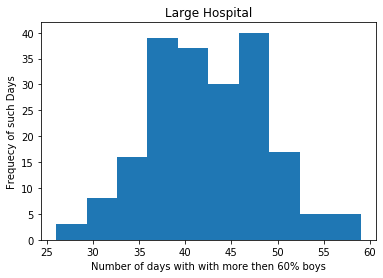

In [6]:
_  = plt.hist(overall_reusult_large_hospital)
plt.xlabel('Number of days with with more then 60% boys')
plt.ylabel('Frequecy of such Days')
plt.title('Large Hospital')

Text(0.5, 1.0, 'Small Hospital')

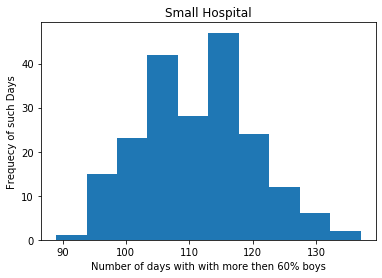

In [8]:
_  = plt.hist(overall_reusult_small_hospital)
plt.xlabel('Number of days with with more then 60% boys')
plt.ylabel('Frequecy of such Days')
plt.title('Small Hospital')

Small Hospital is more likely to have more then 60% boys 

### Intuition:

Large hospital have large number of births (i.e more observations as compare to small hospital).<br>
Hence, According to Central Limit Theorem it is less likely to divert from the true value.( 0.5 chance of boy birth)

vise versa for small hospital. It is more likely to divert from the true value because it has less number of observations. 